In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization libraries (optional, but helpful for EDA)
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Now we know the data is comma-separated
# Loading the dataset correctly as CSV
data = pd.read_csv('cc_approvals.data', header=None)

# Displaying the first few rows of the dataset
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [3]:
# Check for missing values
print(data.isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [19]:
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
        data[col] = label_encoder.fit_transform(data[col])

# Check if all values are numeric now
print(data.head())


   0    1      2   3   4   5   6     7   8   9   10  11   12  13
0   2  156  0.000   2   1  13   8  1.25   1   1   1   0    0   0
1   1  328  4.460   2   1  11   4  3.04   1   1   6   0  560   0
2   1   89  0.500   2   1  11   4  1.50   1   0   0   0  824   0
3   2  125  1.540   2   1  13   8  3.75   1   1   5   0    3   0
4   2   43  5.625   2   1  13   8  1.71   1   0   0   2    0   0


In [21]:
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,0,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,2,0,0


In [23]:
# Check for missing values
print(data.isnull().sum())

# Option: Impute missing values with the median (numerical) or mode (categorical)
data.fillna(data.median(), inplace=True)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [25]:
data_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,0,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,52,10.085,3,3,5,4,1.25,0,0,0,0,0,1
686,1,71,0.750,2,1,2,8,2.00,0,1,2,0,394,1
687,1,97,13.500,3,3,6,3,2.00,0,1,1,0,1,1
688,2,20,0.205,2,1,1,8,0.04,0,0,0,0,750,1


In [27]:
# Split the dataset into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column is the target


In [29]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (552, 13)
Test set size: (138, 13)


In [31]:
# Scale the features
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)


Accuracy: 84.06%
Confusion Matrix:
[[60 10]
 [12 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.85      0.82      0.84        68

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



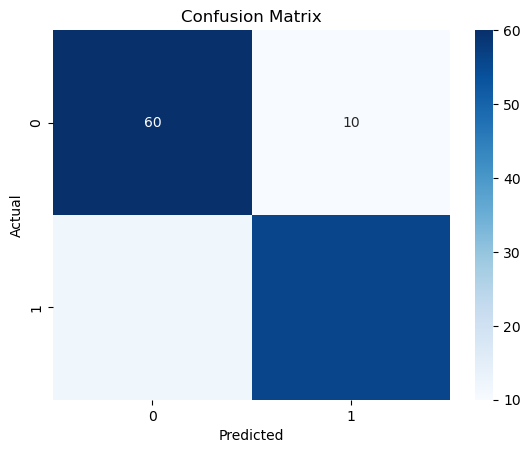

In [39]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Optional: Plot confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 86.23%
